In [46]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import numpy as np
import scipy.io as sp
from mpl_toolkits.mplot3d import Axes3D


In [47]:
dataSet = sp.loadmat('breastw.mat') #On charge le dataset
X = dataSet['X'] #On extrait la donnée du champ 'X' du dictionnaire
np.shape(X) #shape() de la bibliothèque numpy (ici np), renvoie la taille de la matrice (array numpy) en argument

(683, 9)

In [48]:
y = dataSet['y']
y.shape

(683, 1)

In [62]:
reduce2D = PCA(n_components = 2)
Xreduced2D = reduce2D.fit_transform(X)


In [63]:
model = KMeans(n_clusters = 2)
model.fit(X)
kmeansEstimate = model.predict(X)
centers = model.cluster_centers_
centersreduced2D = reduce2D.fit_transform(centers)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


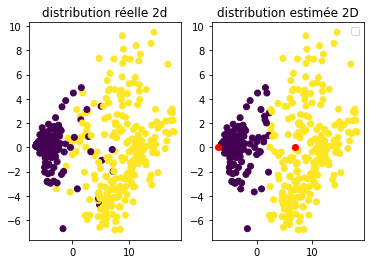

In [65]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.scatter(Xreduced2D[:,0], Xreduced2D[:,1], c = y)
ax1.set_title('distribution réelle 2d')
ax2.scatter(Xreduced2D[:,0], Xreduced2D[:,1], c = kmeansEstimate)
ax2.scatter(centersreduced2D[:,0],centersreduced2D[:,1], c='r')
ax2.set_title ('distribution estimée 2D')
ax2.legend()